# Applied Data Science Capstone Project - Battle of Neighborhood (San Francisco Downtown)

## Part of IBM Data Science Professional Certificate (Coursera)

### Business Problem: 

The project focuses on finding the optimal location for a new hotel in San Francisco based on the competition with Airbnb properties. Initially, we will find the region with the moderate competition in San Francisco. Later, we will explore the neighbourhoods of the region to find 10 most common vanues. Finally, K-means clustering algorithm will be utilized to cluster neighborhoods. 

This project is helpful for the people who is willing to start their new hotel business in San Francisco which is one of most visited cities in the world and it has more than 3 million visitors every year. Therefore, it is very essential to find the best location of the hotel with the best neighbourhood around to attract highest number of visitors. 

We will focus on finding location that has moderate number of Airbnb properties in the region and the 10 most common venues in each neighborhood so that business owner can select the location based on their preferences. 

**For the scope of the project, our focus in only on Airbnb properties and we will not consider hotels information for the project. This could be the future scope of the project**

### Data:

Based on problem definition, following factor can influence the decision: 
    
1) Total number of Airbnb properties in each region & neighborhood   
2) Most common venues in each neighborhood in selected region

**San Francisco Airbnb listing Data**

1. Sr. No.: Serial Number
2. id: Property ID
3. name: Property Name
4. host_is_superhost: Wether the host is superhost or not
5. neighborhood: Neighborhood of the property
6. latitude: Latitude of the property
7. longitude: Longitude of the property
8. price in USD: Avearge price of the property for a day
9. guest_included: Number of guest allowed for a price
10. Region: Region of the property in San Francisco

Dataset URL: https://data.world/ajsanne/sf-airbnb-listings

**Import Necessary Libraries**

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

import json # library to handle JSON files

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

**Foursquare Credentials and Version**

In [ ]:
CLIENT_ID = 'IDXGHRZFC0YY21ZEGIMJFNWYJIXSEX4K4DJVPVROV31M2ZPV' 
CLIENT_SECRET = 'LRYU3HBYCS0TBOFDYPDCW1UQXO3WSJWDCCCR4POX4QBKNGR3' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

VERSION = '20200310'
LIMIT = 100

**Read the dataset**

In [95]:
# Read the dataset

link = "https://raw.githubusercontent.com/Jordan3296/IBM-Data-Science-Final-Project/master/sf_airbnb%20listings.csv"

df = pd.read_csv(link,index_col=0)

In [96]:
# View top rows of dataset

df.head()


,id,name,host_is_superhost,neighbourhood,latitude,longitude,price in USD,guests_included,Region
Sr. No.,,,,,,,,,
1,958,"Bright, Modern Garden Unit - 1BR/1B",t,Lower Haight,37.76931,-122.43386,170.00,2,Western Addition
2,5858,Creative Sanctuary,f,Bernal Heights,37.74511,-122.42102,235.00,2,Southern
3,7918,A Friendly Room - UCSF/USF - San Francisco,f,Cole Valley,37.76669,-122.45250,65.00,1,Western Addition
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,f,Cole Valley,37.76487,-122.45183,65.00,1,Western Addition
5,8339,Historic Alamo Square Victorian,f,Alamo Square,37.77525,-122.43637,685.00,2,Western Addition


In [97]:
# Shape of data frame

df.shape

(7575, 9)

**Change the column names of Dataset**

In [98]:
df.columns = ['ID', 'Name', 'Superhost', 'Neighborhood', 'Latitude', 'Longitude', 'Price in USD', 'No. of Guest', 'Region' ]
df.head()


,ID,Name,Superhost,Neighborhood,Latitude,Longitude,Price in USD,No. of Guest,Region
Sr. No.,,,,,,,,,
1,958,"Bright, Modern Garden Unit - 1BR/1B",t,Lower Haight,37.76931,-122.43386,170.00,2,Western Addition
2,5858,Creative Sanctuary,f,Bernal Heights,37.74511,-122.42102,235.00,2,Southern
3,7918,A Friendly Room - UCSF/USF - San Francisco,f,Cole Valley,37.76669,-122.45250,65.00,1,Western Addition
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,f,Cole Valley,37.76487,-122.45183,65.00,1,Western Addition
5,8339,Historic Alamo Square Victorian,f,Alamo Square,37.77525,-122.43637,685.00,2,Western Addition


# Methodology

Methodology has following 2 parts: 
    
1.) **Explaratory Data Analysis:** Visualise the number of Airbnb properties in San Francisco neighborhoods to identify the optimal location for the new hotel. 
    
2.) **Modelling:** To assist business owners to find region in San Francisco that has moderate competition with Airbnb properties using **K-Means** clustering. K-means clustering is the unsupervised machine learning technique that cluster the observation based on predefined size of the cluster. We will use cluster size of 5 for the project to cluster 9 neighborhoods in 5 clusters. The idea of using K-means clustering to group neighborhoods with similar venues so that business owner can shortlist area of interest based on their preferences. 

## Exploratory Data Analysis

Find number of properties in each region. 

In [99]:
df['Region'].value_counts()

Southern             3302
Western Addition     1805
Downtown             1275
Outside Lands         659
North of Downtown     534
Name: Region, dtype: int64

Find number of properties in each neighborhood. 

In [100]:
df['Neighborhood'].value_counts()

Mission District         722
SoMa                     526
Western Addition/NOPA    438
Bernal Heights           394
Noe Valley               364
Richmond District        362
Outer Sunset             361
Downtown                 347
The Castro               313
Nob Hill                 309
Haight-Ashbury           210
Potrero Hill             204
Pacific Heights          179
Bayview                  170
Inner Sunset             150
Union Square             135
Telegraph Hill           134
Excelsior                127
Cole Valley              125
Duboce Triangle          115
Russian Hill             108
Tenderloin               108
Marina                   105
Crocker Amazon           103
South Beach              100
Sunnyside                 95
Lower Haight              89
Hayes Valley              89
Glen Park                 71
Mission Terrace           70
Twin Peaks                67
Chinatown                 66
Financial District        65
Alamo Square              63
Cow Hollow    

**Importing libraries for Data Visualization**

In [101]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


**Ploting bar graph for highest number of properties in each region** 

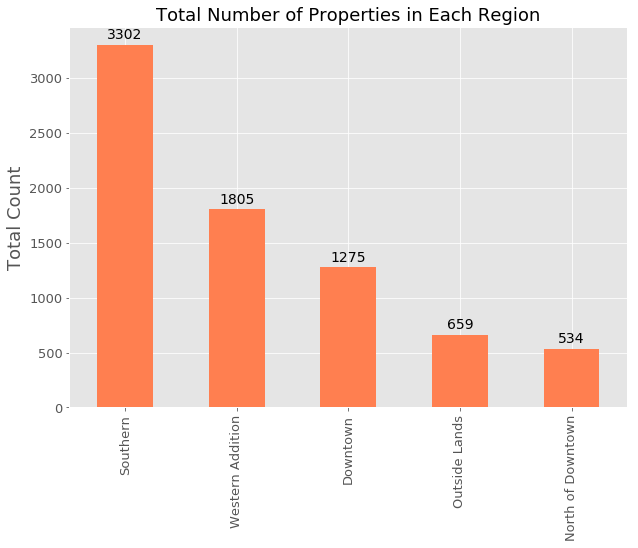

In [102]:
ax = df['Region'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Total Number of Properties in Each Region", fontsize=18)
ax.set_ylabel("Total Count", fontsize=18);


# create a list to collect the plt.patches data
totals = []

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()


**Since, business owner is looking for the region with moderate number of Airbnb properties. There, I would recommend focusing on "Downtown" region as there are no higher number of Airbnb properties compared to "Southern & Western Addition region" which means the competition will be less and we would not want to locate the hotel in other places such as "Outside Lands & North of Downtown" where there might be chances of less occupancy in future.**

*Other places such as hotels are considered out of scope for this project*. 

In [103]:
# Create list of Neighborhood with number of Properties

Neighborhood = ['Chinatown', 'Civic Center', 'Downtown', 'Financial District', 'Mission Bay', 'Nob Hill', 'North Beach', 'Telegraph Hill', 'Tenderloin', 'Union Square']
No_of_Properties = [66, 25, 347, 65, 44, 309, 42, 134, 108, 135]


In [104]:
# Create a dictionary

Df_dict = {'Neighborhood': pd.Series(Neighborhood), 'No_of_Properties': pd.Series(No_of_Properties)}


In [105]:
# Create a pandas DataFrame from dictionary

dframe = pd.DataFrame(Df_dict)

dframe

,Neighborhood,No_of_Properties
0,Chinatown,66
1,Civic Center,25
2,Downtown,347
3,Financial District,65
4,Mission Bay,44
5,Nob Hill,309
6,North Beach,42
7,Telegraph Hill,134
8,Tenderloin,108
9,Union Square,135


**Ploting bar graph for number of properties in the neighborhood of San Francisco Downtown**

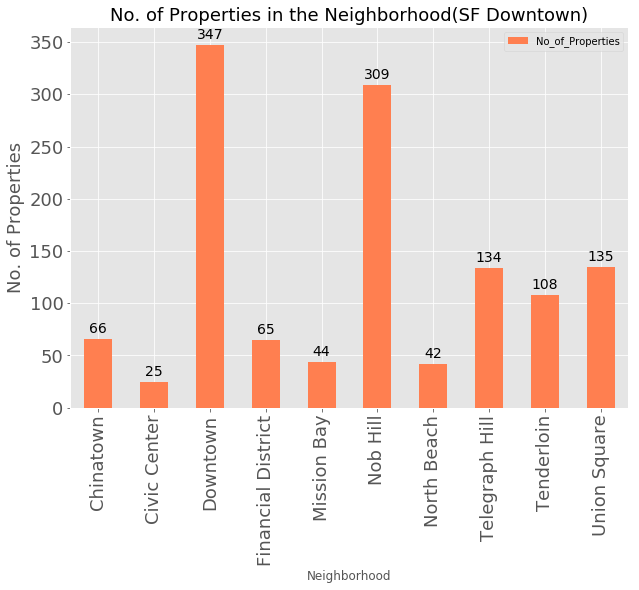

In [106]:
ax = dframe.plot(kind='bar', x = 'Neighborhood', y = 'No_of_Properties', figsize=(10,7),
                                        color="coral", fontsize=18);
ax.set_alpha(0.8)
ax.set_title("No. of Properties in the Neighborhood(SF Downtown)", fontsize=18)
ax.set_ylabel("No. of Properties", fontsize=18);


# create a list to collect the plt.patches data
totals = []

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()


# Generating Co-ordinates for the neighborhood in San Francisco

In [107]:
Neighborhood = ['Chinatown', 'Civic Center', 'Downtown', 'Financial District', 'Mission Bay', 'Nob Hill', 'North Beach', 'Telegraph Hill', 'Tenderloin', 'Union Square']

Region = ['Downtown', 'Downtown', 'Downtown','Downtown', 'Downtown', 'Downtown', 'Downtown', 'Downtown', 'Downtown', 'Downtown']

Latitude = ['','','','','','','','','','']
Longitude = ['','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Region':Region,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Region', 'Latitude', 'Longitude'], index=None)

kut_neig


,Neighborhood,Region,Latitude,Longitude
0,Chinatown,Downtown,,
1,Civic Center,Downtown,,
2,Downtown,Downtown,,
3,Financial District,Downtown,,
4,Mission Bay,Downtown,,
5,Nob Hill,Downtown,,
6,North Beach,Downtown,,
7,Telegraph Hill,Downtown,,
8,Tenderloin,Downtown,,
9,Union Square,Downtown,,


Co-ordinates of "Chinatown"

In [108]:
address = 'Chinatown, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chinatown, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chinatown, San Francisco are 37.7943011, -122.4063757.


Co-ordinates of "Civic Center"

In [112]:
address = 'Civic Center, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Civic Center, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Civic Center, San Francisco are 37.7795939, -122.4167938.


Co-ordinates of "Downtown"

In [113]:
address = 'Downtown, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown, San Francisco are 37.7875138, -122.407159.


Co-ordinates of "Financial District"

In [115]:
address = 'Financial District, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Financial District, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Financial District, San Francisco are 37.7936467, -122.3989378.


Co-ordinates of "Mission Bay"

In [118]:
address = 'Mission Bay, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mission Bay, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mission Bay, San Francisco are 37.7707742, -122.3911712.


Co-ordinates of "Nob Hill"

In [119]:
address = 'Nob Hill, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Nob Hill, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Nob Hill, San Francisco are 37.7932622, -122.415249.


Co-ordinates of  "North Beach"

In [120]:
address = 'North Beach, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North Beach, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North Beach, San Francisco are 37.8011749, -122.4090021.


Co-ordinates of "Telegraph Hill"

In [121]:
address = 'Telegraph Hill, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Telegraph Hill, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Telegraph Hill, San Francisco are 37.800785, -122.4040908.


Co-ordinates of "Tenderloin"

In [122]:
address = 'Tenderloin, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tenderloin, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tenderloin, San Francisco are 37.7842493, -122.4139933.


Co-ordinates of "Union Square"

In [126]:
address = 'Union Square, San Francisco, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Union Square, San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Union Square, San Francisco are 37.7879363, -122.40751740318035.


In [168]:
# Creating Dataframe of Neighborhood with Co-ordinates

Neighborhood = ['Chinatown', 'Civic Center', 'Downtown', 'Financial District', 'Mission Bay', 'Nob Hill', 'North Beach', 'Telegraph Hill', 'Tenderloin', 'Union Square']

Region = ['Downtown', 'Downtown', 'Downtown','Downtown', 'Downtown', 'Downtown', 'Downtown', 'Downtown', 'Downtown', 'Downtown']

Latitude = [37.794301, 37.779594, 37.787514, 37.793647, 37.770774, 37.793262, 37.801175, 37.800785, 37.784249, 37.787936]
Longitude = [-122.406376, -122.416794, -122.407159, -122.398938, -122.391171, -122.415249, -122.409002, -122.404091, -122.413993, -122.407517]

df_neigh = {'Neighborhood': Neighborhood,'Region':Region,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Region', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Region,Latitude,Longitude
0,Chinatown,Downtown,37.794301,-122.406376
1,Civic Center,Downtown,37.779594,-122.416794
2,Downtown,Downtown,37.787514,-122.407159
3,Financial District,Downtown,37.793647,-122.398938
4,Mission Bay,Downtown,37.770774,-122.391171
5,Nob Hill,Downtown,37.793262,-122.415249
6,North Beach,Downtown,37.801175,-122.409002
7,Telegraph Hill,Downtown,37.800785,-122.404091
8,Tenderloin,Downtown,37.784249,-122.413993
9,Union Square,Downtown,37.787936,-122.407517


## Visualize the Neighborhood of San Francisco Downtown

In [128]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Region'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_lon)  
    
map_lon

# Modelling

1.) Find max 100 numbers of venues within a 500 meter radius of each neighborhood.  
2.) Perform one hot encoding on the venues data.  
3.) Group Venues by the neighborhoods.   
4.) Perform K-means clustering (K=5)

**Function to extract venues from each neighborhood**

In [136]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
            
       

In [137]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Chinatown
Civic Center
Downtown
Financial District
Mission Bay
Nob Hill
North Beach
Telegraph Hill
Tenderloin
Union Square


In [138]:
print(kut_venues.shape)
kut_venues.head()

(939, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chinatown,37.794301,-122.406376,Blue Bottle Coffee,37.792771,-122.404833,Coffee Shop
1,Chinatown,37.794301,-122.406376,Hinodeya,37.794656,-122.404544,Ramen Restaurant
2,Chinatown,37.794301,-122.406376,Red Blossom Tea Company,37.794643,-122.406379,Tea Room
3,Chinatown,37.794301,-122.406376,Chapel Hill Coffee Co.,37.794041,-122.404247,Coffee Shop
4,Chinatown,37.794301,-122.406376,Mister Jiu's,37.793790,-122.406615,Chinese Restaurant


In [139]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Downtown,100,100,100,100,100,100
Financial District,100,100,100,100,100,100
Mission Bay,74,74,74,74,74,74
Nob Hill,65,65,65,65,65,65
North Beach,100,100,100,100,100,100
Telegraph Hill,100,100,100,100,100,100
Tenderloin,100,100,100,100,100,100


In [140]:

print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 192 uniques categories.


**One hot Encoding**

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [141]:
# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Yoga Studio,Acai House,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Grouping rows by neighborhood and taking the mean of the frequency of occurence for each category**

In [142]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Yoga Studio,Acai House,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint
0,Chinatown,0.000000,0.00,0.00,0.020000,0.00,0.00,0.00,0.01,0.010000,...,0.00,0.00,0.010000,0.02,0.00,0.01,0.020000,0.00,0.00,0.000000
1,Civic Center,0.000000,0.00,0.00,0.020000,0.00,0.00,0.01,0.00,0.020000,...,0.00,0.00,0.030000,0.04,0.00,0.00,0.010000,0.00,0.00,0.000000
2,Downtown,0.000000,0.00,0.01,0.010000,0.00,0.01,0.00,0.00,0.010000,...,0.00,0.00,0.000000,0.00,0.01,0.00,0.020000,0.00,0.01,0.000000
3,Financial District,0.010000,0.01,0.00,0.010000,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.010000,0.00,0.00,0.00,0.020000,0.01,0.00,0.000000
4,Mission Bay,0.013514,0.00,0.00,0.013514,0.00,0.00,0.00,0.00,0.013514,...,0.00,0.00,0.000000,0.00,0.00,0.00,0.013514,0.00,0.00,0.000000
5,Nob Hill,0.030769,0.00,0.00,0.030769,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.015385,0.00,0.00,0.00,0.046154,0.00,0.00,0.015385
6,North Beach,0.010000,0.00,0.01,0.000000,0.01,0.01,0.00,0.00,0.010000,...,0.00,0.01,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000
7,Telegraph Hill,0.010000,0.00,0.01,0.020000,0.00,0.00,0.00,0.01,0.010000,...,0.00,0.01,0.000000,0.02,0.00,0.00,0.010000,0.00,0.00,0.000000
8,Tenderloin,0.000000,0.00,0.00,0.010000,0.00,0.02,0.00,0.01,0.000000,...,0.01,0.00,0.010000,0.10,0.00,0.00,0.020000,0.00,0.00,0.000000
9,Union Square,0.000000,0.00,0.01,0.020000,0.00,0.00,0.00,0.00,0.010000,...,0.00,0.00,0.000000,0.00,0.01,0.00,0.010000,0.00,0.01,0.000000


In [143]:
kut_grouped.shape

(10, 192)

In [ ]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

**Dataframe for the venues**

In [145]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Display top 10 venues for each neighborhood**

In [171]:
um_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Chinatown,Coffee Shop,Chinese Restaurant,Bakery,New American Restaurant,Men's Store
1,Civic Center,Café,Coffee Shop,Cocktail Bar,Vietnamese Restaurant,Beer Bar
2,Downtown,Boutique,Jewelry Store,Clothing Store,Hotel,Theater
3,Financial District,Coffee Shop,Food Truck,Café,Gym,Salad Place
4,Mission Bay,Food Truck,Gym,Coffee Shop,Pharmacy,Park


## Clustering Similar Neighborhoods using K-Means Algorithm

In [147]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 0, 3, 4, 1, 2, 2, 3, 0], dtype=int32)

In [148]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Chinatown,Downtown,37.794301,-122.406376,3,Coffee Shop,Chinese Restaurant,Bakery,New American Restaurant,Men's Store
1,Civic Center,Downtown,37.779594,-122.416794,3,Café,Coffee Shop,Cocktail Bar,Vietnamese Restaurant,Beer Bar
2,Downtown,Downtown,37.787514,-122.407159,0,Boutique,Jewelry Store,Clothing Store,Hotel,Theater
3,Financial District,Downtown,37.793647,-122.398938,3,Coffee Shop,Food Truck,Café,Gym,Salad Place
4,Mission Bay,Downtown,37.770774,-122.391171,4,Food Truck,Gym,Coffee Shop,Pharmacy,Park


In [149]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
Neighborhood             10 non-null object
Region                   10 non-null object
Latitude                 10 non-null float64
Longitude                10 non-null float64
Cluster Labels           10 non-null int32
1st Most Common Venue    10 non-null object
2nd Most Common Venue    10 non-null object
3rd Most Common Venue    10 non-null object
4th Most Common Venue    10 non-null object
5th Most Common Venue    10 non-null object
dtypes: float64(2), int32(1), object(7)
memory usage: 840.0+ bytes


In [150]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)

In [151]:
kut_merged.shape

(10, 10)

In [152]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [153]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 10 columns):
Neighborhood             10 non-null object
Region                   10 non-null object
Latitude                 10 non-null float64
Longitude                10 non-null float64
Cluster Labels           10 non-null int64
1st Most Common Venue    10 non-null object
2nd Most Common Venue    10 non-null object
3rd Most Common Venue    10 non-null object
4th Most Common Venue    10 non-null object
5th Most Common Venue    10 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 880.0+ bytes


## Visualize the clusters

In [155]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

For the ease, each of the cluster is color coded and we can observe that the majority of neighborhood falls under green cluster which is the 4th cluster. Other clusters colored red, blue,pink and orange has 2 neighborhoods,1 neighborhood,2 neighborhoods, 1 neighborhood respectively. 

## Analysis

Analyze each cluster to observe the different characteristics of each cluster and neighborhoods in it. 

**Examine the first cluster**

In [156]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Downtown,Downtown,37.787514,-122.407159,0,Boutique,Jewelry Store,Clothing Store,Hotel,Theater
9,Union Square,Downtown,37.787936,-122.407517,0,Boutique,Hotel,Jewelry Store,Clothing Store,Theater


The cluster 1 has 2 neighborhoods out of 9. The cluster consist common venue such as Boutique, Jewelry Store, Hotel, Clothing Store, Jewelry Store, Theater etc. 

In [157]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Nob Hill,Downtown,37.793262,-122.415249,1,Italian Restaurant,Hotel,Bar,Café,Coffee Shop


The cluster 2 has one neighborhood that consist venues such as Italian Restaurant, Hotel, Bar, Cafe, Coffee Shop. 

In [158]:

kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,North Beach,Downtown,37.801175,-122.409002,2,Italian Restaurant,Pizza Place,Bakery,Café,Cocktail Bar
7,Telegraph Hill,Downtown,37.800785,-122.404091,2,Italian Restaurant,Pizza Place,Cocktail Bar,Café,Coffee Shop


The cluster 3 has 2 neighborhoods out of 9 and cluster consist of vanues such as italian restaurant, Pizza place, bakery, cocktail bar and Cafe etc. 

In [159]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Chinatown,Downtown,37.794301,-122.406376,3,Coffee Shop,Chinese Restaurant,Bakery,New American Restaurant,Men's Store
1,Civic Center,Downtown,37.779594,-122.416794,3,Café,Coffee Shop,Cocktail Bar,Vietnamese Restaurant,Beer Bar
3,Financial District,Downtown,37.793647,-122.398938,3,Coffee Shop,Food Truck,Café,Gym,Salad Place
8,Tenderloin,Downtown,37.784249,-122.413993,3,Vietnamese Restaurant,Coffee Shop,Thai Restaurant,Theater,Cocktail Bar


The cluster 4 has the highest number of neighborhoods in the cluster. It has 4 neighborhoods out of 9 and cluster consist of vanues such as coffee shop, Cafe, Vietnamese restauranr, Chinese Restuarant, Food Truck, Bakery, gym, Beer Bar etc. 

In [164]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Region,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Mission Bay,Downtown,37.770774,-122.391171,4,Food Truck,Gym,Coffee Shop,Pharmacy,Park


Cluster 5 has one neighborhood which has venues such as food truck, gym, coffee shop, pharmacy and park etc. 

# Results:

The aim of the project is to help business owners to find the best place in San Francisco downtown. The business owners can choose the location based on the most common venues around. As an example, if a business owner wants a hotel that has shopping venues around such as boutique, jewelry store, clothing store then they can choose a neighborhood from cluster 1. In cluster 2,3 & 4 most of the places are food places. Such as if business owner wants a hotel near Italian Restaurant, Hotel, Bar, Cafe, Coffee Shop then he/she would choose cluster 2. The neighborhood in cluster 3 has proximity to Italian restaurant, Pizza place, bakery, cocktail bar and Café. Cluster 4 that has the highest neighborhoods and scattered based on Fig – 12, the business owner will choose such neighborhood if the preference is in favor of coffee shop, Cafe, Vietnamese restaurant, Chinese Restaurant, Food Truck, Bakery, gym, Beer Bar. Business owner will choose cluster 5 where there is only one neighborhood if he/she wants a hotel near places such as food truck, gym, coffee shop, pharmacy and park. 

# Conclusion:

This project aims to help business owners to have a better understanding of neighborhoods in comparison with most common places around neighborhood. It is essential to use the technology to gain advantage in business such as knowing more about location before starting the business in the region. In this project, the competition with Airbnb properties has been considered. The future scope of this project can include the competition with other hotel, price offered by other business owner, safety in the neighborhood. 